# ml_10_2
## SVM 시각화

In [183]:
%pylab inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Populating the interactive namespace from numpy and matplotlib


In [184]:
cancer = load_breast_cancer()

col1=0
col2=1
X=cancer.data[:,[col1,col2]]
y=cancer.target

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [185]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_scaled = (X_train-X_mean)/X_std
X_test_scaled = (X_test-X_mean)/X_std

X_train_scaled.shape, X_test_scaled.shape

((426, 2), (143, 2))

In [186]:
'''
C=[0.1,1,1000]
gamma=[0.001,0.01,0.1,1,10]
s_train=[]
s_test=[]

for c in C:
    s1=[]
    s2=[]
    for g in gamma:
        model=SVC(C=c,gamma=g)
        model.fit(X_train_scaled,y_train)

        pred_y=model.predict(X_test_scaled)
        s1.append(model.score(X_train_scaled,y_train))
        s2.append(model.score(X_test_scaled,y_test))
        #print('\n>>> C: %.1f, gamma: %.1f' % (C,gamma))
        #print('Train Score: %f' % model.score(X_train_scaled,y_train))
        #print('Test Score: %f' % model.score(X_test_scaled,y_test))
    s_train.append(s1)
    s_test.append(s2)
    
fig=figure(figsize=[12,8])
for i in range(len(C)):
    plt.subplot(1,len(C),i+1)
    plt.plot(s_train[i],'gs--',label='train')
    plt.plot(s_test[i],'ro-',label='test')
    plt.title('C= %f' % (C[i]))
    plt.xticks(range(len(gamma)),gamma)
    plt.ylim(0,1)
    plt.xlabel('gamma')
    plt.ylabel('score')
    plt.legend(loc='lower right')
'''

"\nC=[0.1,1,1000]\ngamma=[0.001,0.01,0.1,1,10]\ns_train=[]\ns_test=[]\n\nfor c in C:\n    s1=[]\n    s2=[]\n    for g in gamma:\n        model=SVC(C=c,gamma=g)\n        model.fit(X_train_scaled,y_train)\n\n        pred_y=model.predict(X_test_scaled)\n        s1.append(model.score(X_train_scaled,y_train))\n        s2.append(model.score(X_test_scaled,y_test))\n        #print('\n>>> C: %.1f, gamma: %.1f' % (C,gamma))\n        #print('Train Score: %f' % model.score(X_train_scaled,y_train))\n        #print('Test Score: %f' % model.score(X_test_scaled,y_test))\n    s_train.append(s1)\n    s_test.append(s2)\n    \nfig=figure(figsize=[12,8])\nfor i in range(len(C)):\n    plt.subplot(1,len(C),i+1)\n    plt.plot(s_train[i],'gs--',label='train')\n    plt.plot(s_test[i],'ro-',label='test')\n    plt.title('C= %f' % (C[i]))\n    plt.xticks(range(len(gamma)),gamma)\n    plt.ylim(0,1)\n    plt.xlabel('gamma')\n    plt.ylabel('score')\n    plt.legend(loc='lower right')\n"

In [187]:
model=SVC(kernel='rbf',C=1,gamma=0.1,probability=True)
#model=SVC(kernel='poly',C=1,gamma=0.1,probability=True)
#model=SVC(kernel='sigmoid',probability=True)
model.fit(X_train_scaled,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [188]:
model.support_vectors_.shape, model.dual_coef_.shape

((135, 2), (1, 135))

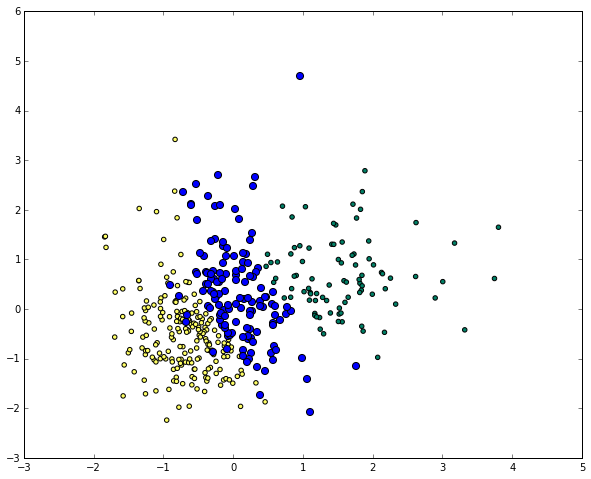

In [189]:
sv=model.support_vectors_

fig=plt.figure(figsize=[10,8])
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=y_train,cmap='summer')
plt.scatter(sv[:,0],sv[:,1],s=50)

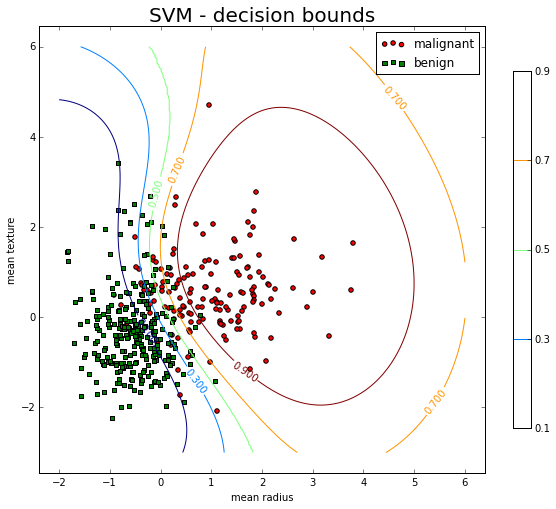

In [193]:
xx=np.linspace(-2,6,200)
yy=np.linspace(-3,6,200)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
decision_values = model.predict_proba(X_grid)[:,0]

sv=model.support_vectors_

fig=plt.figure(figsize=[10,8])
CS=plt.contour(data1,data2,decision_values.reshape(data1.shape),levels=np.arange(0.1,1,0.2))
plt.clabel(CS, inline=2, fontsize=10)

plt.scatter(X_train_scaled[:,0][y_train==0],X_train_scaled[:,1][y_train==0],marker='o',c='r',label='malignant')
plt.scatter(X_train_scaled[:,0][y_train==1],X_train_scaled[:,1][y_train==1],marker='s',c='g',label='benign')
#plt.scatter(sv[:,0],sv[:,1],s=100,marker='*',alpha=0.5)
plt.legend()
plt.colorbar(CS,shrink=0.8)
plt.xlabel(cancer.feature_names[col1])
plt.ylabel(cancer.feature_names[col2])
plt.title('SVM - decision bounds',fontsize=20)

In [191]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs)
    Make a scatter plot of x vs y, where x and y are sequence like objects
    of the same lengths.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional, default: 20
        size in points^2.
    
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array of
        values to be colormapped.  `c` can be a 2-D array in which the
        rows a